# Chuyển ảnh sang miền tần số

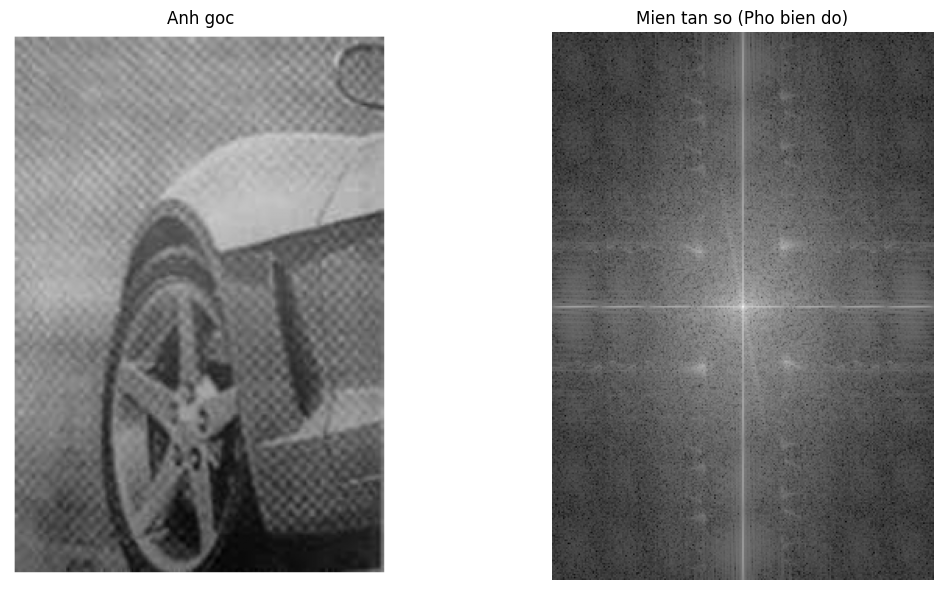

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_to_frequency_domain(image_path):
    """
    Chuyen anh sang mien tan so su dung FFT
    """
    # Doc anh va chuyen sang grayscale neu can
    img = cv2.imread(image_path)
    if img is None:
        print("Khong the doc anh. Kiem tra lai duong dan!")
        return None, None, None
    
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img
    
    # Thuc hien Fast Fourier Transform (FFT)
    f = np.fft.fft2(img_gray)
    
    # Dich tan so zero vao trung tam
    fshift = np.fft.fftshift(f)
    
    # Tinh magnitude spectrum (pho bien do)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # +1 de tranh log(0)
    
    return img_gray, magnitude_spectrum, fshift

# Su dung ham
image_path = r"C:\ImageProcessing\Doan-xulyanh\img\locChan\anhXehoi.png"
original_img, freq_domain, fshift = image_to_frequency_domain(image_path)

# Kiem tra xem anh co doc thanh cong khong
if original_img is not None:
    # Hien thi ket qua
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Anh goc')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(freq_domain, cmap='gray')
    plt.title('Mien tan so (Pho bien do)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Co loi xay ra khi xu ly anh!")